In [266]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
# from sklearn.metrics import silhouette_score
import sklearn
from copy import deepcopy

In [254]:
workload_data = pd.read_csv(index_col=0, filepath_or_buffer='data.csv')
labeled_data = pd.read_csv(index_col=0, filepath_or_buffer='labels.csv')

267


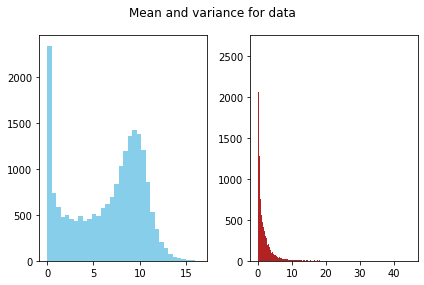

In [255]:
data_var = workload_data.var()
data_mean = workload_data.mean()
zero_var_indices = []
for i, var in enumerate(data_var):
    if var == 0:
        zero_var_indices.append(i)

# print(zero_var_indices)
print(len(zero_var_indices))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean and variance for data')
ax1.hist(data_mean, color='skyblue', label='means', bins='auto')
ax2.hist(data_var, color='firebrick', label='variances', bins='auto')
plt.tight_layout()
plt.show()

In [256]:
# variance filtering
var_lim = 2.2
ind = []
for i, var in enumerate(data_var):
    if var > var_lim:
        ind.append(i)

trimmed_data = workload_data.iloc[:, ind]
print(len(workload_data.T))
print(len(trimmed_data.T))


20531
5074


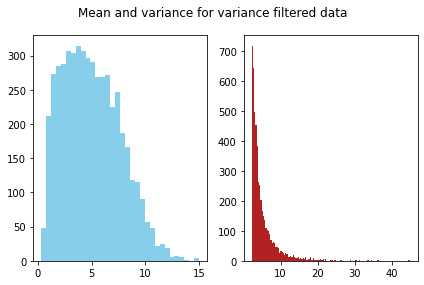

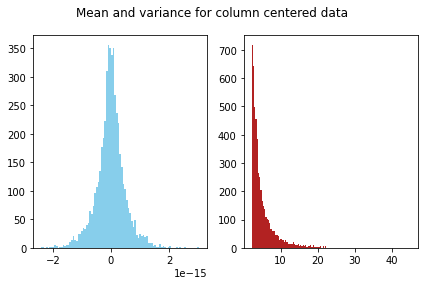

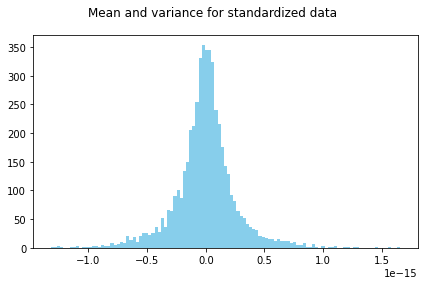

mean of column centered data: -0.00
mean of standardized data: -0.00
std of standardized data: 1.00


In [257]:
data_var = trimmed_data.var()
data_mean = trimmed_data.mean()
zero_var_indices = []
for i, var in enumerate(data_var):
    if var == 0:
        zero_var_indices.append(i)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean and variance for variance filtered data')
ax1.hist(data_mean, color='skyblue', label='means', bins='auto')
ax2.hist(data_var, color='firebrick', label='variances', bins='auto')
plt.tight_layout()
plt.show()

# From here on out we are using trimmed data as main data
col_centered = trimmed_data - trimmed_data.mean()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean and variance for column centered data')
ax1.hist(col_centered.mean(), color='skyblue', label='means', bins='auto')
ax2.hist(col_centered.var(), color='firebrick', label='variances', bins='auto')
plt.tight_layout()
plt.show()

standardized = col_centered/col_centered.std()
fig, (ax1) = plt.subplots(1)
fig.suptitle('Mean and variance for standardized data')
ax1.hist(standardized.mean(), color='skyblue', label='means', bins='auto')
plt.tight_layout()
plt.show()


standardized = col_centered/col_centered.std()
print(f'mean of column centered data: {col_centered.mean().mean():.2f}')
print(f'mean of standardized data: {standardized.mean().mean():.2f}')
print(f'std of standardized data: {standardized.std().mean():.2f}')

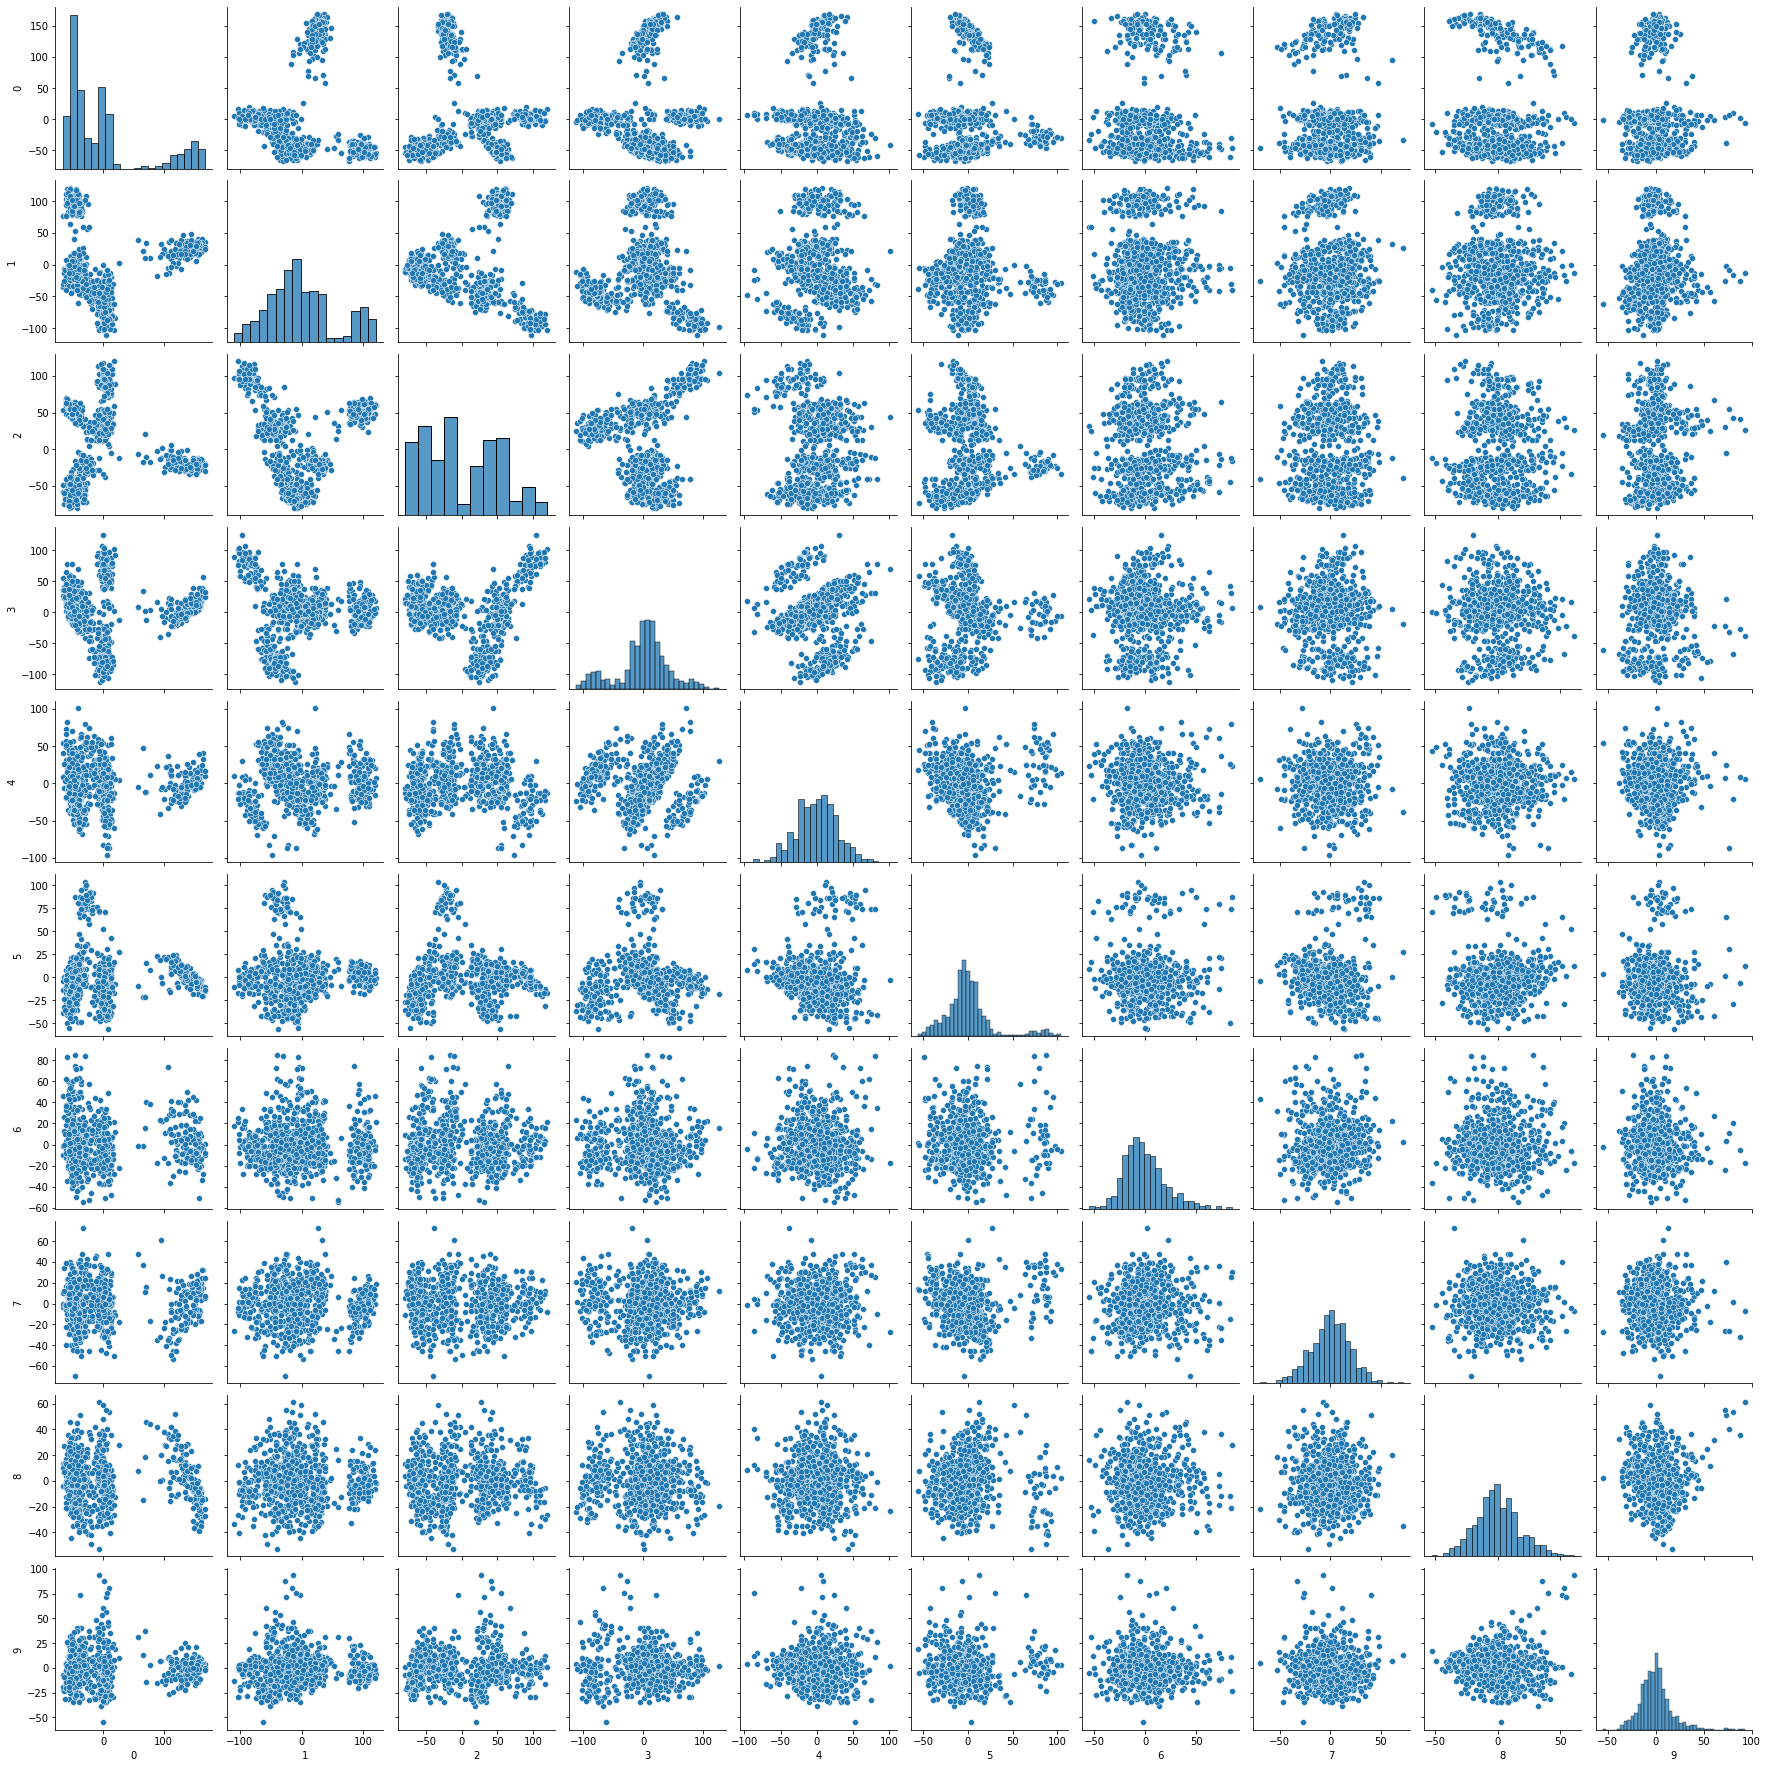

In [258]:
# principal component analysis
n_pc = 10
pca = PCA(n_components=n_pc)
principalComponents = pca.fit_transform(col_centered)
principalComponents_df = pd.DataFrame(principalComponents)

sns.pairplot(principalComponents_df)
# print(principalComponents_df)



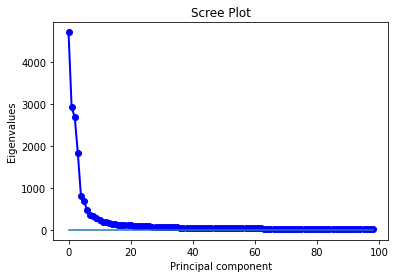

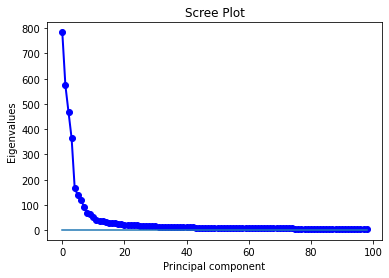

In [259]:

n_pc = 100
pca = PCA(n_components=n_pc)
pca.fit_transform(col_centered)
lambdas = pca.explained_variance_
# print(pca.explained_variance_)
a = 0
b = -1
lamb_trimmed = lambdas[a:b]

plt.plot(range(a,len(lamb_trimmed)+a), lamb_trimmed, 'o-', linewidth=2, color='blue')
plt.plot(range(a,len(lamb_trimmed)+a), np.ones(len(lamb_trimmed)))
plt.title('Scree Plot')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalues')
plt.show()


pca.fit_transform(standardized)
lambdas = pca.explained_variance_
# print(pca.explained_variance_)
a = 0
b = -1
lamb_trimmed = lambdas[a:b]

plt.plot(range(a,len(lamb_trimmed)+a), lamb_trimmed, 'o-', linewidth=2, color='blue')
plt.plot(range(a,len(lamb_trimmed)+a), np.ones(len(lamb_trimmed)))
plt.title('Scree Plot')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalues')
plt.show()


In [260]:
# time for clustering
n_pc = 5
pca = PCA(n_components=n_pc)
principalComponents = pca.fit_transform(col_centered)

max_number_clusters = 10
cluster_sizes = range(2, max_number_clusters)
n_runs = 5
kmeans_s_scores = []
gmm_s_scores = []
kmeans_db_scores = []
gmm_db_scores = []
kmeans_inertias = []
gmm_bics = []
for n_clusters in cluster_sizes:
    kmeans_s_score = 0
    gmm_s_score = 0
    kmeans_db_score = 0
    kmeans_inertia = 0
    gmm_bic = 0
    for _ in range(n_runs):
        # fit kmeans
        KM_model = KMeans(n_clusters=n_clusters)
        KM_model.fit(principalComponents)
        prediction_kmeans = KM_model.predict(principalComponents)
        # fit gmm
        GM_model = GaussianMixture(n_components=n_clusters)
        GM_model.fit(principalComponents)
        prediction_gmm = GM_model.predict(principalComponents)
        # kmeans scores
        kmeans_s_score =+ sklearn.metrics.silhouette_score(principalComponents, prediction_kmeans)
        kmeans_db_score =+ sklearn.metrics.davies_bouldin_score(principalComponents, prediction_kmeans)
        kmeans_inertia =+ KM_model.inertia_
        # gmm scores        
        gmm_s_score =+ sklearn.metrics.silhouette_score(principalComponents, prediction_gmm)
        gmm_db_score =+ sklearn.metrics.davies_bouldin_score(principalComponents, prediction_gmm)
        gmm_bic =+ GM_model.bic(principalComponents)
        
    kmeans_s_scores.append(kmeans_s_score/n_runs)
    gmm_s_scores.append(gmm_s_score/n_runs)
    kmeans_db_scores.append(kmeans_db_score/n_runs)
    gmm_db_scores.append(gmm_db_score/n_runs)
    kmeans_inertias.append(kmeans_inertia/n_runs)
    gmm_bics.append(gmm_bic/n_runs)
 



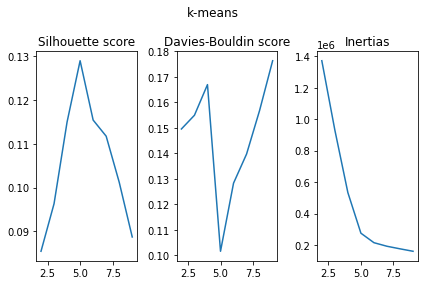

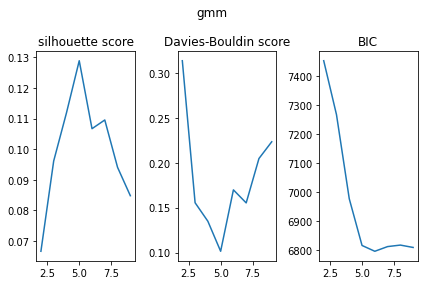

In [261]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(cluster_sizes, kmeans_s_scores)
ax1.set_title('Silhouette score')
ax2.plot(cluster_sizes, kmeans_db_scores)
ax2.set_title('Davies-Bouldin score')
ax3.plot(cluster_sizes, kmeans_inertias)
ax3.set_title('Inertias')
fig.suptitle('k-means')
plt.tight_layout()
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(cluster_sizes, gmm_s_scores)
ax1.set_title('silhouette score')
ax2.plot(cluster_sizes, gmm_db_scores)
ax2.set_title('Davies-Bouldin score')
ax3.plot(cluster_sizes, gmm_bics)
ax3.set_title('BIC')
fig.suptitle('gmm')
plt.tight_layout()
plt.show()

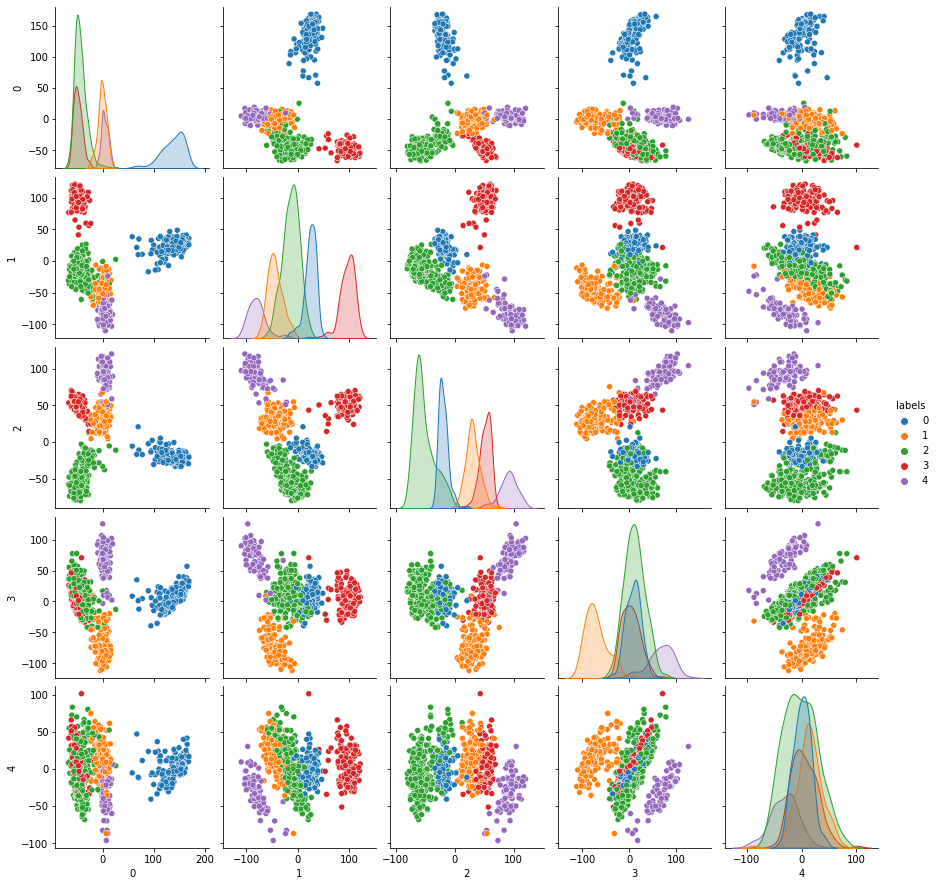

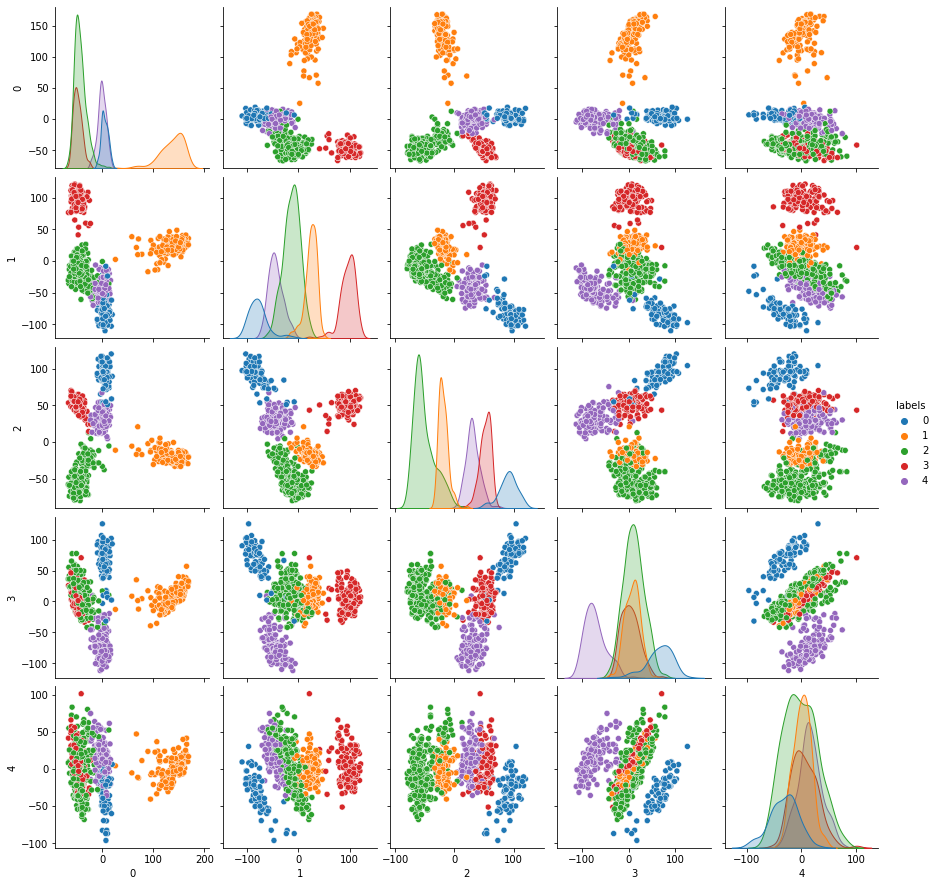

In [267]:
n_clusters = 5
KM_model = KMeans(n_clusters=n_clusters)
KM_model.fit(principalComponents)
prediction_kmeans = KM_model.predict(principalComponents)

GM_model = GaussianMixture(n_components=n_clusters)
GM_model.fit(principalComponents)
prediction_gmm = GM_model.predict(principalComponents)

principalComponents_df = pd.DataFrame(principalComponents)
principalComponents_df_kmeans = deepcopy(principalComponents_df)
principalComponents_df_kmeans['labels'] = prediction_kmeans
principalComponents_df_gmm = deepcopy(principalComponents_df)
principalComponents_df_gmm['labels'] = prediction_gmm


sns.pairplot(principalComponents_df_kmeans, hue='labels', palette="tab10")
sns.pairplot(principalComponents_df_gmm, hue='labels', palette="tab10")


['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
predicted 5 and true number is 5


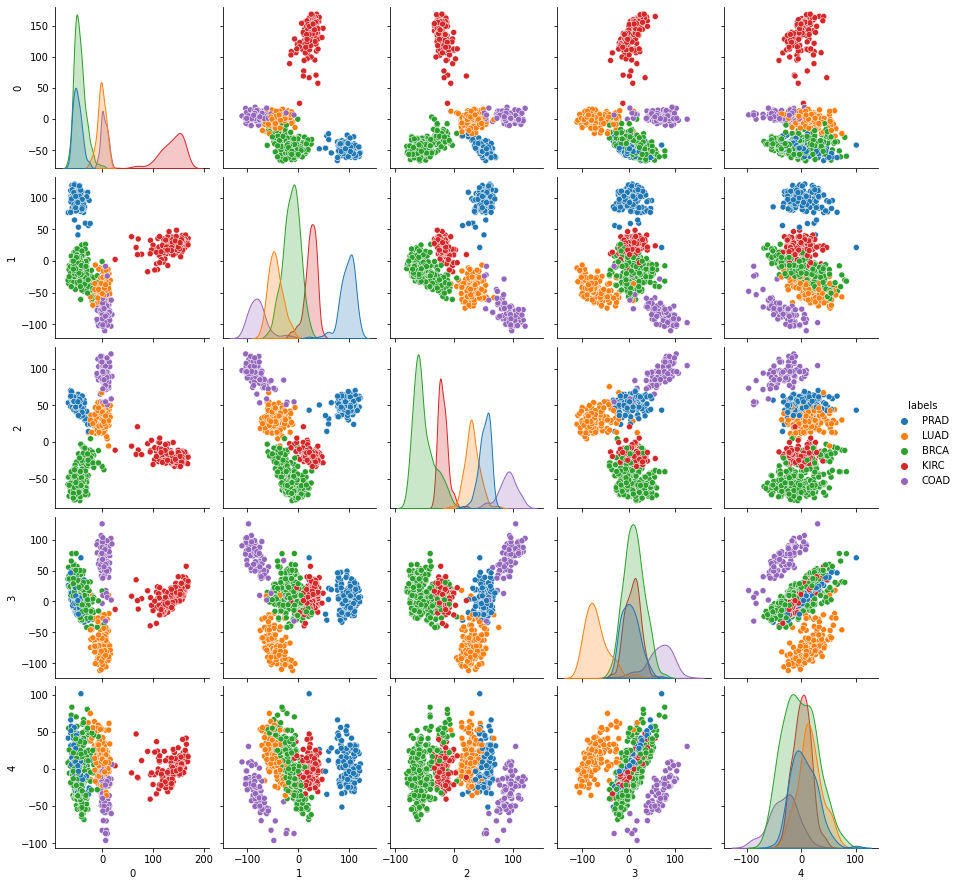

In [268]:
# true labels
print(labeled_data['Class'].unique())
print("predicted 5 and true number is 5")

principalComponents_df_true = deepcopy(principalComponents_df)
principalComponents_df_kmeans['labels'] = np.matrix(labeled_data)

sns.pairplot(principalComponents_df_kmeans, hue='labels')


In [368]:
# Q2
n_M = 20
n_K = 10
frac = 0.8
n = len(workload_data)
n_sub = int(np.floor(frac*n))
M = np.zeros([n_M, n, n])
J = np.zeros([n_M, n, n])
# C = np.zeros([n_M, n, n])
for m in range(n_M):
    subsample = principalComponents_df.sample(n_sub)
    index_list = subsample.index.values
    for n_clusters in range(2, n_K):
        KM_model = KMeans(n_clusters=n_clusters)
        KM_model.fit(principalComponents)
        prediction_kmeans = KM_model.predict(principalComponents)
        for i in range(n_sub):
            for j in range(n_sub):
                sample_i = prediction_kmeans[i]
                sample_j = prediction_kmeans[j]
                if sample_i == sample_j:
                    M[m][i][j] = 1
        # for k, index1 in enumerate(index_list):
        #     for index2 in index_list[k:]:
        #         J[m][index1][index2] = 1
        for index1 in index_list:
            for index2 in index_list:
                J[m][index1][index2] = 1

    
M = sum(M)
J = sum(J)
print(J)
# C = np.divide(M, J)
# print(C)




[[16. 12. 11. ... 13. 14. 14.]
 [12. 16. 12. ... 12. 13. 14.]
 [11. 12. 14. ... 11. 11. 12.]
 ...
 [13. 12. 11. ... 16. 14. 13.]
 [14. 13. 11. ... 14. 16. 13.]
 [14. 14. 12. ... 13. 13. 17.]]


In [369]:
a = [1, 2, 3, 0]
print(np.count_nonzero(J))
print(J.shape)
print(801*801-np.count_nonzero(J))

641601
(801, 801)
0


In [374]:
a = np.ones([2, 3, 2, 2])
print(a)
print(sum(a))

[[[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]


 [[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]]
[[[2. 2.]
  [2. 2.]]

 [[2. 2.]
  [2. 2.]]

 [[2. 2.]
  [2. 2.]]]
